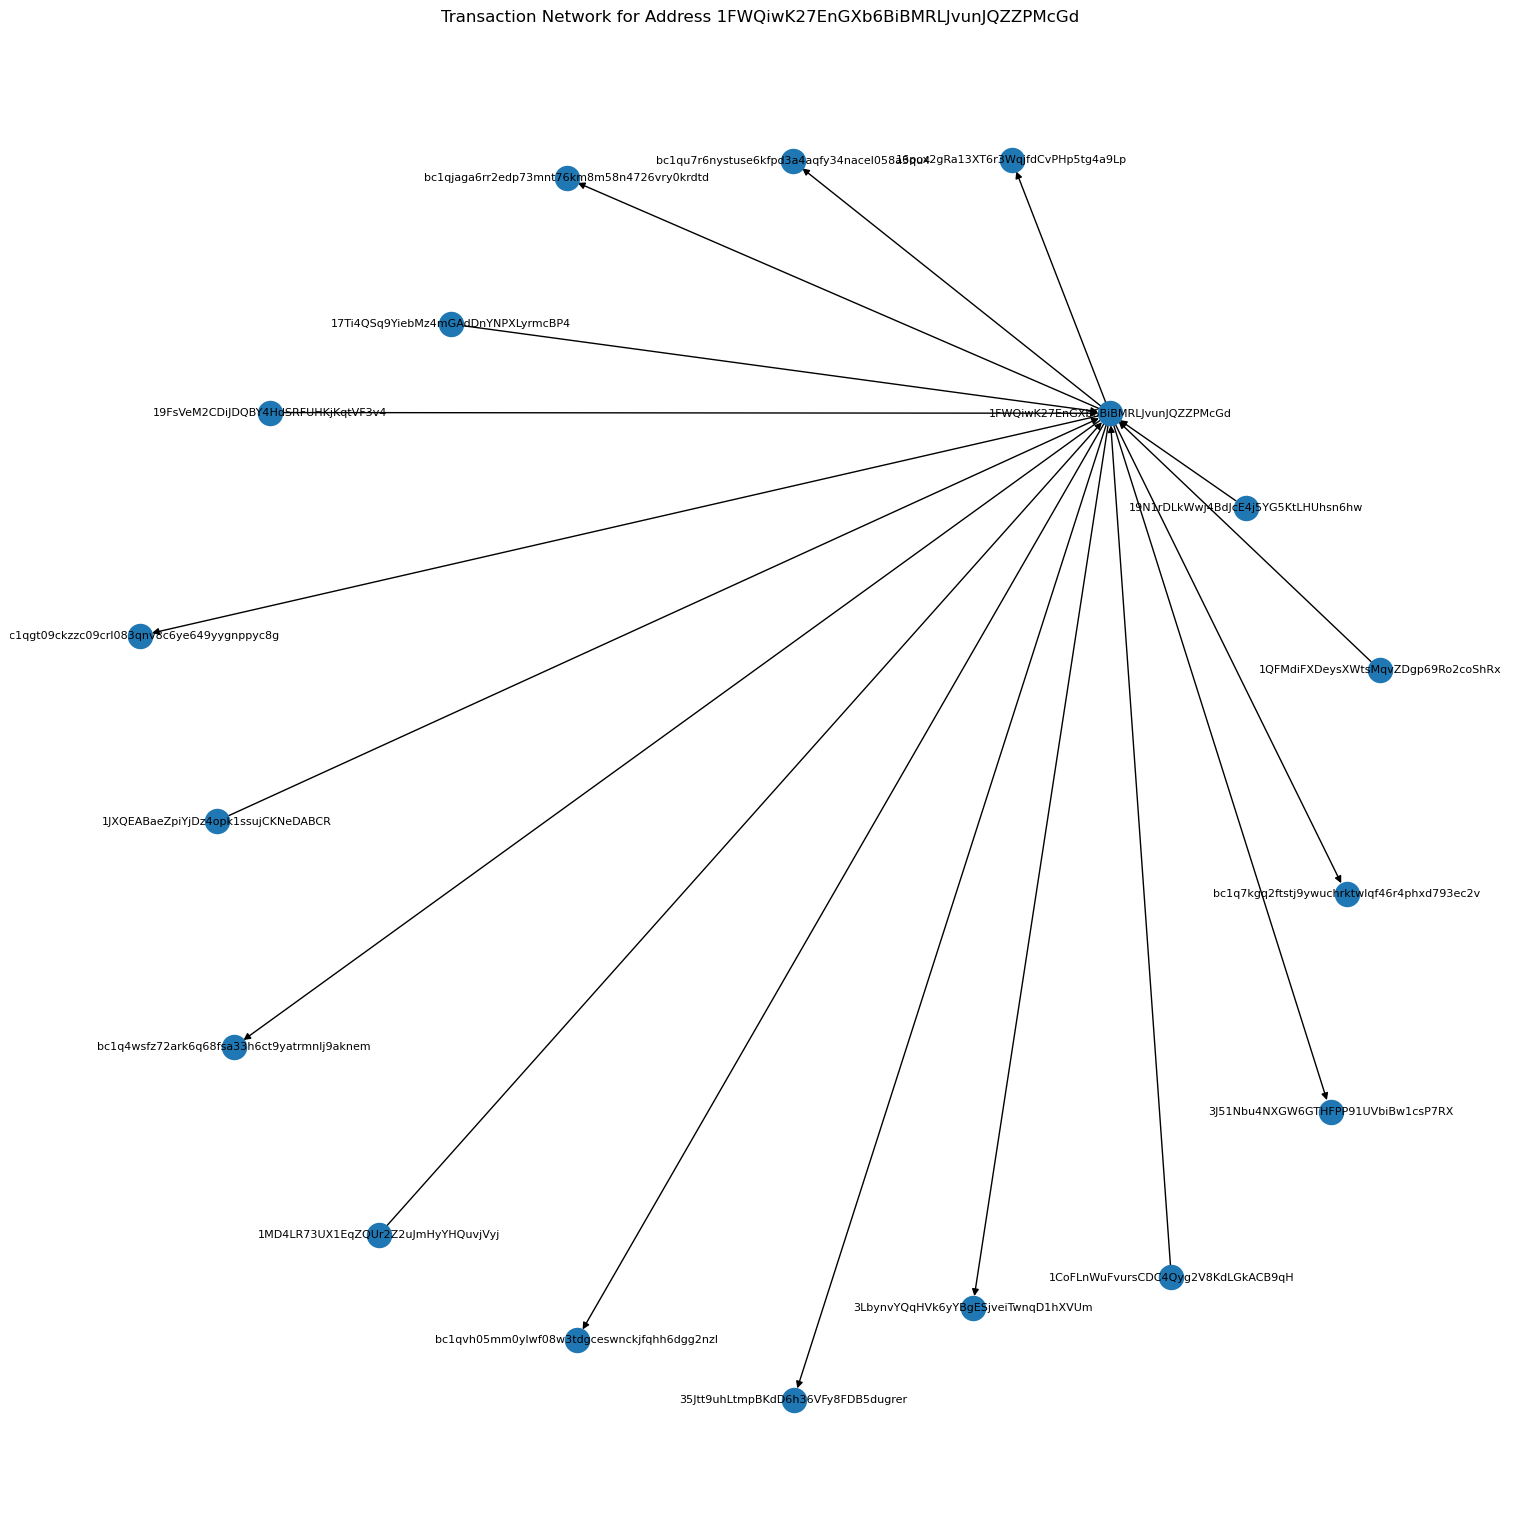

Total transactions found: 10


In [17]:
import requests
import networkx as nx
import matplotlib.pyplot as plt


url = "https://blockchain.info/rawaddr/1FWQiwK27EnGXb6BiBMRLJvunJQZZPMcGd?limit=10"
response = requests.get(url)
data = response.json()


G = nx.DiGraph() 

#add nodes and edges 
for tx in data['txs']:
    inputs = [input['prev_out']['addr'] for input in tx['inputs']]
    outputs = [output['addr'] for output in tx['out']]
    for input_addr in inputs:
        for output_addr in outputs:
            if input_addr != output_addr:
                G.add_edge(input_addr, output_addr)


pos = nx.spring_layout(G, k=3, iterations=50)
plt.figure(figsize=(15, 15))
nx.draw(G, pos=pos, with_labels=True, node_size=300, font_size=8)
plt.title("Transaction Network for Address 1FWQiwK27EnGXb6BiBMRLJvunJQZZPMcGd")
plt.show()
print(f"Total transactions found: {len(data['txs'])}")


In [20]:
/Users/jowenap/Downloads/PEPE_1M_graph_coinmarketcap.csv

         timestamp     price
0    1755442993376  0.000011
1    1755446573572  0.000011
2    1755450029329  0.000011
3    1755453792151  0.000011
4    1755457328140  0.000011
..             ...       ...
714  1758020795801  0.000011
715  1758024125679  0.000011
716  1758027749588  0.000011
717  1758031339548  0.000011
718  1758033733000  0.000011

[719 rows x 2 columns]


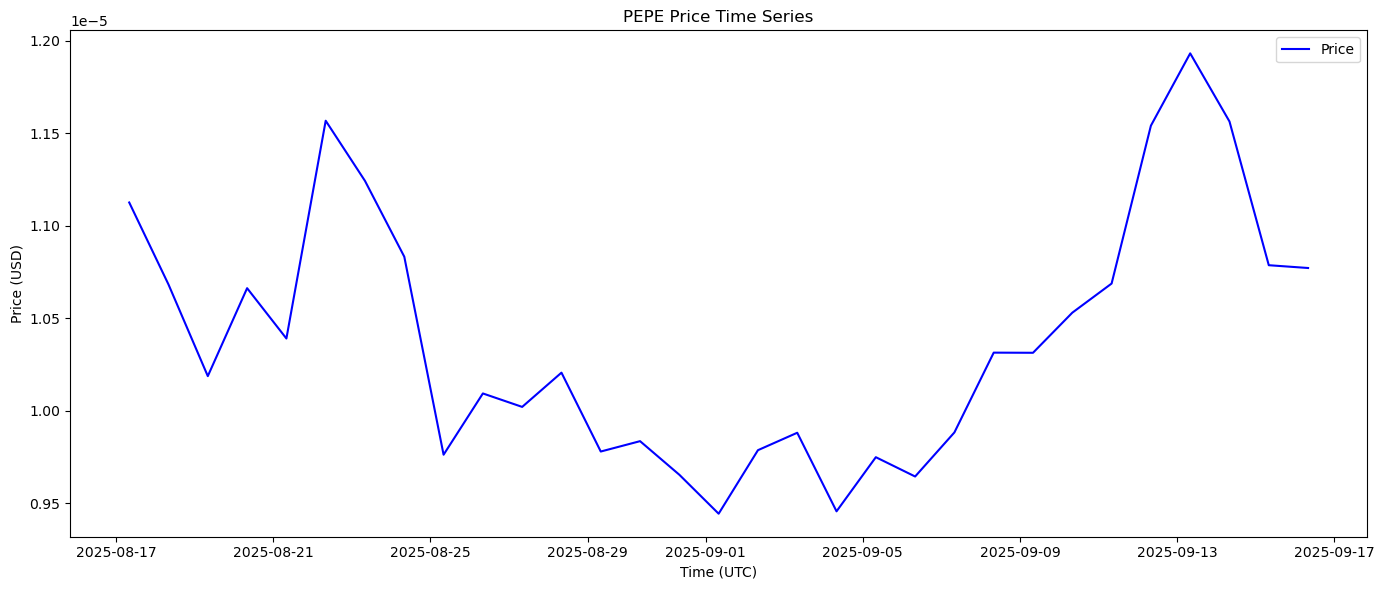

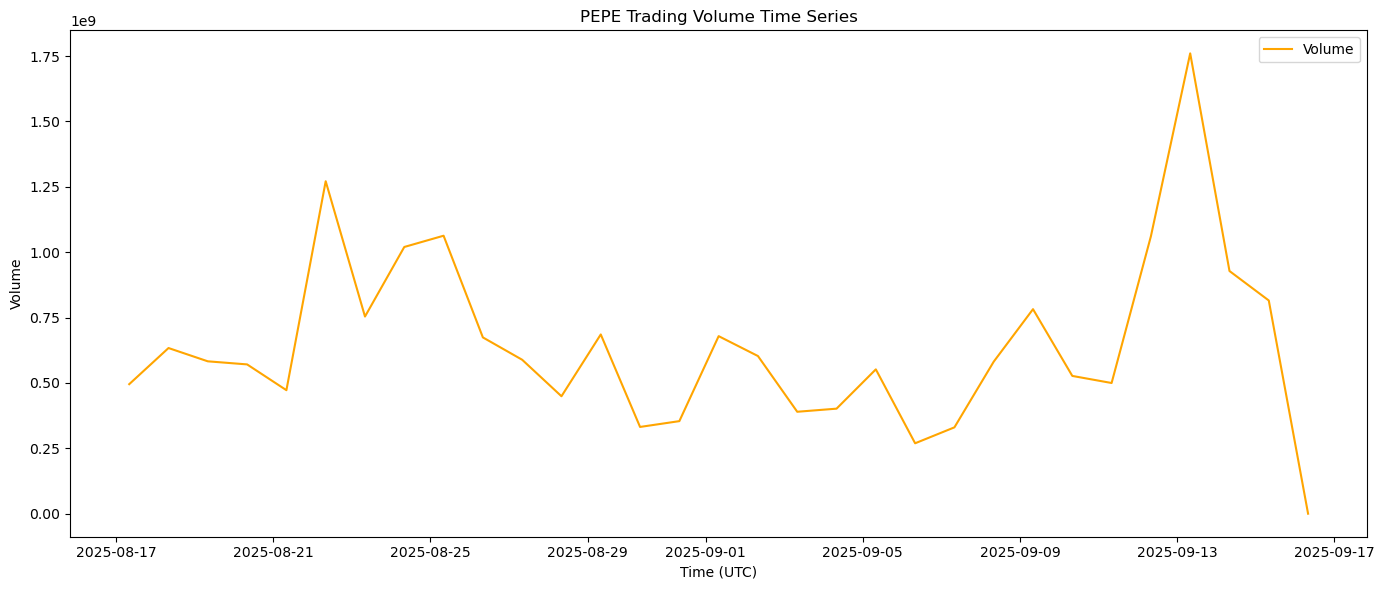

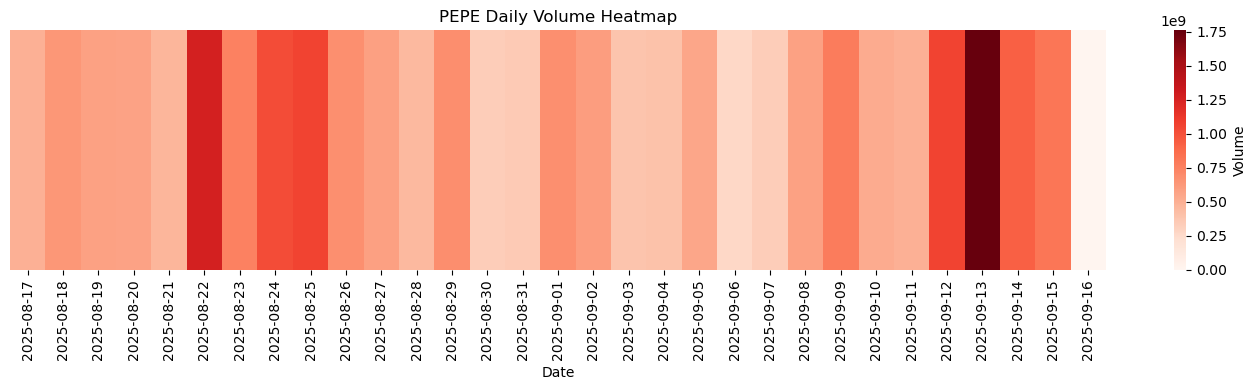

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Using crypto token "PEPE"
CSV_PATH = "/Users/jowenap/Downloads/PEPE_1M_graph_coinmarketcap.csv"
df = pd.read_csv(CSV_PATH, delimiter=";")

#ensure correct format
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce", utc=True)
df = df.dropna(subset=["timestamp"]).set_index("timestamp")

# Time Series for Price
plt.figure(figsize=(14,6))
plt.plot(df.index, df["close"], color="blue", label="Price")
plt.ylabel("Price (USD)")
plt.xlabel("Time (UTC)")
plt.title("PEPE Price Time Series")
plt.legend()
plt.tight_layout()
plt.show()

#Time Series for Volume
plt.figure(figsize=(14,6))
plt.plot(df.index, df["volume"], color="orange", label="Volume")
plt.ylabel("Volume")
plt.xlabel("Time (UTC)")
plt.title("PEPE Trading Volume Time Series")
plt.legend()
plt.tight_layout()
plt.show()

#HeatMap
df["date"] = df.index.date

pivot = df.pivot_table(columns="date", values="volume", aggfunc="sum", fill_value=0)

plt.figure(figsize=(14,4))
sns.heatmap(pivot, cmap="Reds", cbar_kws={"label": "Volume"})
plt.title("PEPE Daily Volume Heatmap")
plt.xlabel("Date")
plt.ylabel("")  
plt.yticks([], []) 
plt.tight_layout()
plt.show()


#Two major red-flag periods stand out. On Aug 22 and Sep 13, PEPE experienced abrupt one-day price 
#surges, each paired with exceptional trading volume. Both peaks retraced rapidly, 
#consistent with pump-and-dump behaviour.

#The abnormal trading pattern is reiterated in the heat map where Both dates appear as the darkest 
#columns,  showing concentrated, extreme trading activity that aligns with the suspected pump-and-dump events
